In [ ]:
# Import necessary libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [ ]:

# Function to load images and labels from the dataset
def load_dataset(dataset_path):
    images = []
    labels = []

    for label in os.listdir(dataset_path):
        label_path = os.path.join(dataset_path, label)
        for image_file in os.listdir(label_path):
            image_path = os.path.join(label_path, image_file)
            image = cv2.imread(image_path)
            image = cv2.resize(image, (64, 64))  # Resize images to a consistent size
            images.append(image)
            labels.append(label)

    return np.array(images), np.array(labels)

# Replace 'your_dataset_path' with the path to your dataset
dataset_path = '/content/drive/MyDrive/data'
images, labels = load_dataset(dataset_path)

In [ ]:
# Flatten images for RandomForestClassifier
images = images.reshape(images.shape[0], -1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Create and train the RandomForestClassifier with training history
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
history = random_forest.fit(X_train, y_train)


In [ ]:
# Make predictions on the test set
y_pred = random_forest.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 75.66%


In [ ]:
# Train the model 20 times and store accuracy for each run
num_iterations = 20
accuracies = []

for iteration in range(num_iterations):
    # Create and train the RandomForestClassifier
    random_forest = RandomForestClassifier(n_estimators=100, random_state=iteration)
    random_forest.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = random_forest.predict(X_test)

    # Evaluate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Iteration {iteration + 1}: Accuracy = {accuracy * 100:.2f}%")

# Print the average accuracy over all iterations
average_accuracy = np.mean(accuracies)
print(f"\nAverage Accuracy over {num_iterations} iterations: {average_accuracy * 100:.2f}%")

Iteration 1: Accuracy = 78.43%
Iteration 2: Accuracy = 77.58%
Iteration 3: Accuracy = 77.36%
Iteration 4: Accuracy = 76.94%
Iteration 5: Accuracy = 77.36%
Iteration 6: Accuracy = 77.26%
Iteration 7: Accuracy = 77.79%
Iteration 8: Accuracy = 79.28%
Iteration 9: Accuracy = 76.73%
Iteration 10: Accuracy = 77.58%
Iteration 11: Accuracy = 76.41%
Iteration 12: Accuracy = 77.05%
Iteration 13: Accuracy = 78.11%
Iteration 14: Accuracy = 77.36%
Iteration 15: Accuracy = 76.51%
Iteration 16: Accuracy = 77.58%
Iteration 17: Accuracy = 77.26%
Iteration 18: Accuracy = 79.06%
Iteration 19: Accuracy = 76.83%
Iteration 20: Accuracy = 77.47%

Average Accuracy over 20 iterations: 77.50%


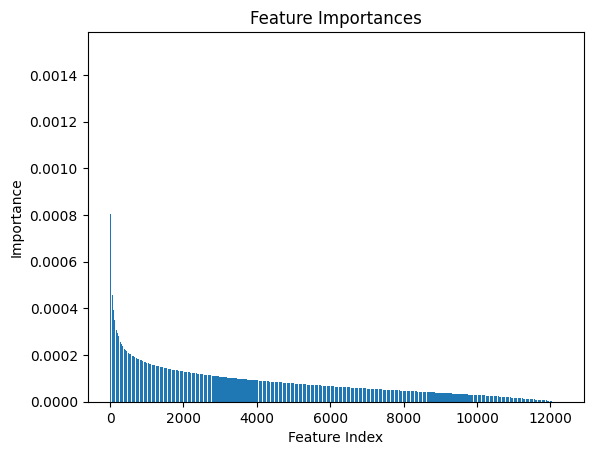

In [ ]:
# Plot feature importances
feature_importances = random_forest.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
plt.bar(range(X_train.shape[1]), feature_importances[sorted_indices])
plt.title('Feature Importances')
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.show()